In [1]:
import warnings
warnings.filterwarnings('ignore')

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'


import math
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style('whitegrid')
%matplotlib inline

In [2]:
kaggle_visible_evaluation = pd. read_csv("kaggle_visible_evaluation_triplets.txt", sep="\t",names=['user_id','song_id','freq'])

In [3]:
kaggle_visible_evaluation.head()

,user_id,song_id,freq
0,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,SOBONKR12A58A7A7E0,1
1,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,SOEGIYH12A6D4FC0E3,1
2,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,SOFLJQZ12A6D4FADA6,1
3,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,SOHTKMO12AB01843B0,1
4,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,SODQZCY12A6D4F9D11,1


In [4]:
unique_tracks = pd. read_csv("unique_tracks.txt",sep='<SEP>',names= ['track_id','song_id','artist_name','title'])

In [5]:
unique_tracks.head()

,track_id,song_id,artist_name,title
0,TRMMMYQ128F932D901,SOQMMHC12AB0180CB8,Faster Pussy cat,Silent Night
1,TRMMMKD128F425225D,SOVFVAK12A8C1350D9,Karkkiautomaatti,Tanssi vaan
2,TRMMMRX128F93187D9,SOGTUKN12AB017F4F1,Hudson Mohawke,No One Could Ever
3,TRMMMCH128F425532C,SOBNYVR12A8C13558C,Yerba Brava,Si Vos QuerÃ©s
4,TRMMMWA128F426B589,SOHSBXH12A8C13B0DF,Der Mystic,Tangle Of Aspens


In [6]:
song_df = pd.merge(kaggle_visible_evaluation,unique_tracks.drop_duplicates(['song_id']), on="song_id", how="left")


In [7]:
song_df.head()

,user_id,song_id,freq,track_id,artist_name,title
0,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,SOBONKR12A58A7A7E0,1,TRAEHHJ12903CF492F,Dwight Yoakam,You're The One
1,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,SOEGIYH12A6D4FC0E3,1,TRLGMFJ128F4217DBE,Barry Tuckwell/Academy of St Martin-in-the-Fie...,Horn Concerto No. 4 in E flat K495: II. Romanc...
2,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,SOFLJQZ12A6D4FADA6,1,TRTNDNE128F1486812,Cartola,Tive Sim
3,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,SOHTKMO12AB01843B0,1,TRASTUE128F930D488,Lonnie Gordon,Catch You Baby (Steve Pitron & Max Sanna Radio...
4,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,SODQZCY12A6D4F9D11,1,TRFPLWO128F1486B9E,Miguel Calo,El Cuatrero


**Let's delete the unnessery columns**

In [8]:
song_df.drop(['track_id'],axis=1, inplace=True)

# Final data is

In [9]:
song_df.head()

,user_id,song_id,freq,artist_name,title
0,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,SOBONKR12A58A7A7E0,1,Dwight Yoakam,You're The One
1,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,SOEGIYH12A6D4FC0E3,1,Barry Tuckwell/Academy of St Martin-in-the-Fie...,Horn Concerto No. 4 in E flat K495: II. Romanc...
2,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,SOFLJQZ12A6D4FADA6,1,Cartola,Tive Sim
3,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,SOHTKMO12AB01843B0,1,Lonnie Gordon,Catch You Baby (Steve Pitron & Max Sanna Radio...
4,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,SODQZCY12A6D4F9D11,1,Miguel Calo,El Cuatrero


In [10]:
song_df.columns          # to know the column names in the data

Index(['user_id', 'song_id', 'freq', 'artist_name', 'title'], dtype='object')

In [11]:
song_df.shape            # to the shape of the data

(1450933, 5)

In [12]:
print('Total number of observations are:',song_df.shape[0])

Total number of observations are: 1450933


### Let's check is there any missing values ###

In [13]:
song_df.isnull().sum()

user_id        0
song_id        0
freq           0
artist_name    0
title          1
dtype: int64

- There is 1 missing value in the release column data. let's drop that row

In [14]:
song_df.dropna(inplace=True)

In [15]:
song_df.shape

(1450932, 5)

In [16]:
song_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1450932 entries, 0 to 1450932
Data columns (total 5 columns):
 #   Column       Non-Null Count    Dtype 
---  ------       --------------    ----- 
 0   user_id      1450932 non-null  object
 1   song_id      1450932 non-null  object
 2   freq         1450932 non-null  int64 
 3   artist_name  1450932 non-null  object
 4   title        1450932 non-null  object
dtypes: int64(1), object(4)
memory usage: 66.4+ MB


- In the given data 4 are object type (**Categorical columns**) columns and 1 is int type(**Numaric type**)

### Let's look in to column by column 

## Univariate analysis

#### user 

In [17]:
print('Total number of users in the data are :',song_df.user_id.nunique())

Total number of users in the data are : 110000


In [18]:
song_df.user_id.value_counts().sort_values(ascending=True).head()
print('**************************************************')
song_df.user_id.value_counts().sort_values(ascending=False).head()

017711d03942d465ce084ea8a763342b557359e9    5
1601ae7a5d798b0c08cc586325702d73b0877159    5
6da40271abf5a33ea54efce2d4bb2aabd39a42e2    5
e6b4b077e7cd98dfe2e6a7cc93b877d5b7f36fa6    5
d0a5c90ceb7236401f525647c01406675fe36a06    5
Name: user_id, dtype: int64

**************************************************


7d90be8dfdbde170f036ce8a4b915440137cb11c    53
03ad93fdb01506ce205f4708decf8e4b1ae90fff    52
2e424b28bff1f62a2dae22a918f09f9c30c06d1b    52
d30e18323f15426c3cdc8585252ed34459916f51    52
016a24e91a72c159a5048ab1b9b2ba5ce761b526    52
Name: user_id, dtype: int64

In [19]:
user_info = pd.DataFrame(song_df.user_id.value_counts())

In [20]:
user_info[(user_info.user_id>20) & (user_info.user_id<31)]

,user_id
fbc2587a0ff4c74c90ce22f0796b04b1d3c25307,30
450f6c72e6f84da4e4419e3d7cb2184e3d9434da,30
cb99fed52828b48479654ff97bff98fe1087a359,30
d2fff30ce66a476ff883095a8823231b7549270d,30
a20fd232241c938169e5d0695f6e61a7de5a9beb,30
...,...
7e354124e631dbf2ae1943bf9e26d1faf2e1e34c,21
1542d2e053108306f8dfbcf8c92d9f10a23358be,21
0996fa6d8e9670079733a1404619505e7e776122,21
623bdd003b8edff83beb9879ca1042bcea508881,21


In [21]:
user_less_then_5 = list(user_info[user_info.user_id <6].index)
Between_6_to_10 = list(user_info[(user_info.user_id >5)&(user_info.user_id <11)].index)
Between_11_to_20 = list(user_info[(user_info.user_id >10)&(user_info.user_id<21)].index)
Between_21_to_30 = list(user_info[(user_info.user_id >20)&(user_info.user_id<31)].index)
Between_31_to_40 = list(user_info[(user_info.user_id >30)&(user_info.user_id<41)].index)
Between_41_to_50 = list(user_info[(user_info.user_id >40)&(user_info.user_id<51)].index)
user_more_then_5 = list(user_info[user_info.user_id >50].index)

In [22]:
user_data = {'less_then_5': len(user_less_then_5),\
            "Between_6_to_10":len(Between_6_to_10),\
            'Between_11_to_20':len(Between_11_to_20),\
            'Between_21_to_30':len(Between_21_to_30),\
            'Between_31_to_40':len(Between_31_to_40),\
            'Between_41_to_50':len(Between_41_to_50),\
            'user_more_then_5':len(user_more_then_5)}

In [23]:
user_data

{'less_then_5': 13097,
 'Between_6_to_10': 41221,
 'Between_11_to_20': 36179,
 'Between_21_to_30': 14392,
 'Between_31_to_40': 4525,
 'Between_41_to_50': 574,
 'user_more_then_5': 12}

<Figure size 1080x360 with 0 Axes>

<BarContainer object of 7 artists>

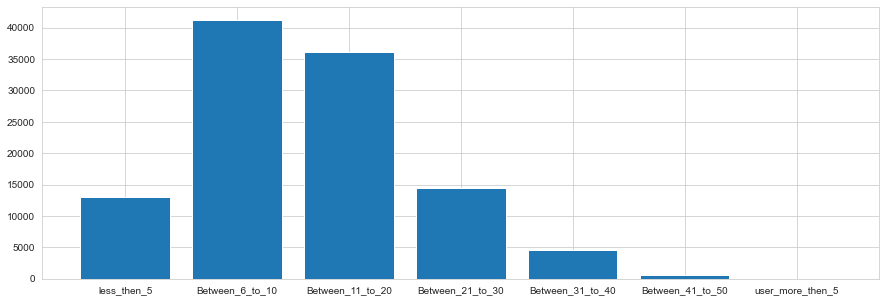

In [24]:
plt.figure(figsize=(15,5))
keys = user_data. keys()
values = user_data. values()
plt. bar(keys, values)


- As we are seeing the people who are listing songs in B/W 6 to 10 are more in the data

- From above one we can say that every user is listing minimum of **5** songs
- maximum number fo songs listed by single user in the given data is **53** songs

### song id

In [25]:
print('Total number of unique songs in the data are :',song_df.song_id.nunique())

Total number of unique songs in the data are : 163205


In [26]:
song_df.song_id.value_counts().sort_values(ascending=True).head()
print('**************************************************')
song_df.song_id.value_counts().sort_values(ascending=False).head()

SOXEKSB12A8C13A321    1
SOOHFSU12AB0182929    1
SOTORBP12A6D4F5FA6    1
SOEMTVH12A8C140DB6    1
SODWIQA12AB0182BBE    1
Name: song_id, dtype: int64

**************************************************


SOFRQTD12A81C233C0    5043
SOAUWYT12A81C206F1    4483
SOBONKR12A58A7A7E0    4136
SOAXGDH12A8C13F8A1    3780
SOSXLTC12AF72A7F54    3672
Name: song_id, dtype: int64

- **song id SOFRQTD12A81C233C0 is the highest number of listed song in the data.**
- **There are some songs that are just listned once by user**

In [27]:
(song_df.song_id.value_counts()==1).sum()

64746

In [28]:
song_info = pd.DataFrame(song_df.song_id.value_counts())

In [29]:
song_info.head()

,song_id
SOFRQTD12A81C233C0,5043
SOAUWYT12A81C206F1,4483
SOBONKR12A58A7A7E0,4136
SOAXGDH12A8C13F8A1,3780
SOSXLTC12AF72A7F54,3672


In [30]:
song_info[song_info.song_id==1]

,song_id
SOOCBSG12AF72A76A0,1
SOTXHOJ12A8C138B48,1
SOMJGVA12A8C1430A2,1
SOJKENM12A58A7B527,1
SOZVOWF12AC90714E5,1
...,...
SOIQNIL12A8C132A0D,1
SOLPXMR12AB018B8C0,1
SORGTHN12AB0181134,1
SOCNKXY12AB017FD07,1


In [31]:
(song_info[song_info.song_id==1].shape[0]/song_info.shape[0])*100

39.67157868937839

- **In the given data there are 64746 songs that are just once by the user in the entire data. This value is nearly 40% in the total songs.**

In [32]:
song_info[song_info.song_id>1000].index

Index(['SOFRQTD12A81C233C0', 'SOAUWYT12A81C206F1', 'SOBONKR12A58A7A7E0',
       'SOAXGDH12A8C13F8A1', 'SOSXLTC12AF72A7F54', 'SONYKOW12AB01849C9',
       'SOEGIYH12A6D4FC0E3', 'SODJWHY12A8C142CCE', 'SOLFXKT12AB017E3E0',
       'SOFLJQZ12A6D4FADA6', 'SOUSMXX12AB0185C24', 'SOUVTSM12AC468F6A7',
       'SOHTKMO12AB01843B0', 'SOTWNDJ12A8C143984', 'SOWCKVR12A8C142411',
       'SOBOUPA12A6D4F81F1', 'SOOFYTN12A6D4F9B35', 'SOPUCYA12A8C13A694',
       'SOVDSJC12A58A7A271', 'SOPPROJ12AB0184E18', 'SOKLRPJ12A8C13C3FE',
       'SOPTLQL12AB018D56F', 'SOUFTBI12AB0183F65', 'SODGVGW12AC9075A8D',
       'SOBOAFP12A8C131F36', 'SOSCIZP12AB0181D2F', 'SOCVTLJ12A6310F0FD',
       'SOLRGVL12A8C143BC3', 'SOFKABN12A8AE476C6', 'SOXFPND12AB017C9D1',
       'SOKUPAO12AB018D576', 'SOCKSGZ12A58A7CA4B', 'SOPXKYD12A6D4FA876',
       'SOUNZHU12A8AE47481', 'SOTWSXL12A8C143349', 'SOTCMDJ12A6D4F8528',
       'SOPQLBY12A6310E992', 'SOSZJFV12AB01878CB', 'SOULTKQ12AB018A183',
       'SOGPBAW12A6D4F9F22', 'SOUFPNI12A8C142D19', 

In [33]:
song_listned_morethen_1000 = list(song_info[song_info.song_id>999].index)
song_between_500_to_1000 = list(song_info[(song_info.song_id<1000)&(song_info.song_id>500)].index)
song_between_500_to_100= list(song_info[(song_info.song_id<501)&(song_info.song_id>101)].index)
song_between_100_to_50 = list(song_info[(song_info.song_id<101)&(song_info.song_id>50)].index)
song_between_50_to_10 = list(song_info[(song_info.song_id<51)&(song_info.song_id>10)].index)
song_between_10_to_5 = list(song_info[(song_info.song_id<11)&(song_info.song_id>5)].index)
song_less_then_5 = list(song_info[song_info.song_id<6].index)

In [34]:
song_data = {'song_listned_morethen_1000': len(song_listned_morethen_1000),\
            "song_between_500_to_1000":len(song_between_500_to_1000),\
            'song_between_500_to_100':len(song_between_500_to_100),\
            'song_between_100_to_50':len(song_between_100_to_50),\
            'song_between_50_to_10':len(song_between_50_to_10),\
            'song_between_10_to_5':len(song_between_10_to_5),\
            'song_less_then_5':len(song_less_then_5)}

In [35]:
song_data

{'song_listned_morethen_1000': 51,
 'song_between_500_to_1000': 108,
 'song_between_500_to_100': 1567,
 'song_between_100_to_50': 2919,
 'song_between_50_to_10': 19964,
 'song_between_10_to_5': 16993,
 'song_less_then_5': 121571}

<Figure size 1440x360 with 0 Axes>

<BarContainer object of 7 artists>

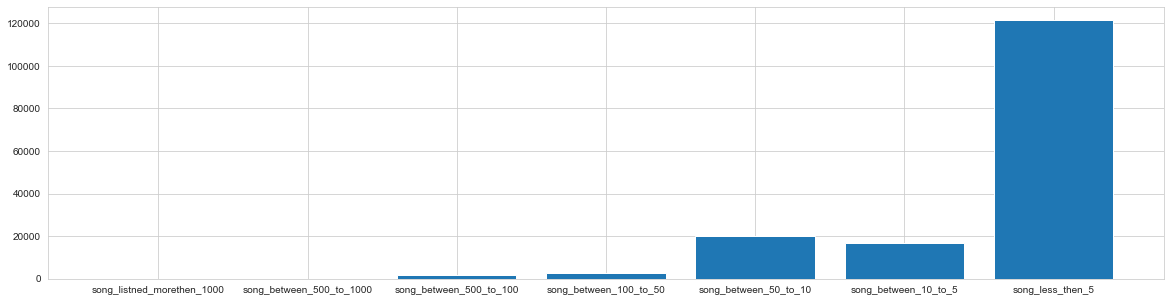

In [36]:
plt.figure(figsize=(20,5))
keys = song_data. keys()
values = song_data. values()
plt. bar(keys, values)


### Freq  

- Number of times user listned single song

In [37]:
song_df.freq.describe()                  # To get the basic staistics

count    1.450932e+06
mean     3.187151e+00
std      7.051666e+00
min      1.000000e+00
25%      1.000000e+00
50%      1.000000e+00
75%      3.000000e+00
max      9.230000e+02
Name: freq, dtype: float64

In [38]:
song_df[song_df.freq ==923]

,user_id,song_id,freq,artist_name,title
1449167,22bb29714137fa47083963c30e1a26f1bf517e7d,SOXTUWG12AB018A2E2,923,Kilgore,Drop The Hammer (Album Version)


- maximum number of times a song is listned by user is 923
  - user id is **22bb29714137fa47083963c30e1a26f1bf517e7d**
  - song id is **SOXTUWG12AB018A2E2**

<AxesSubplot:xlabel='freq', ylabel='Density'>

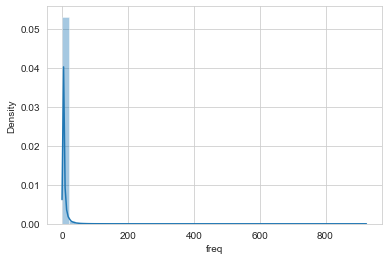

In [39]:
sns.distplot(song_df.freq)

<Figure size 3600x288 with 0 Axes>

<AxesSubplot:>

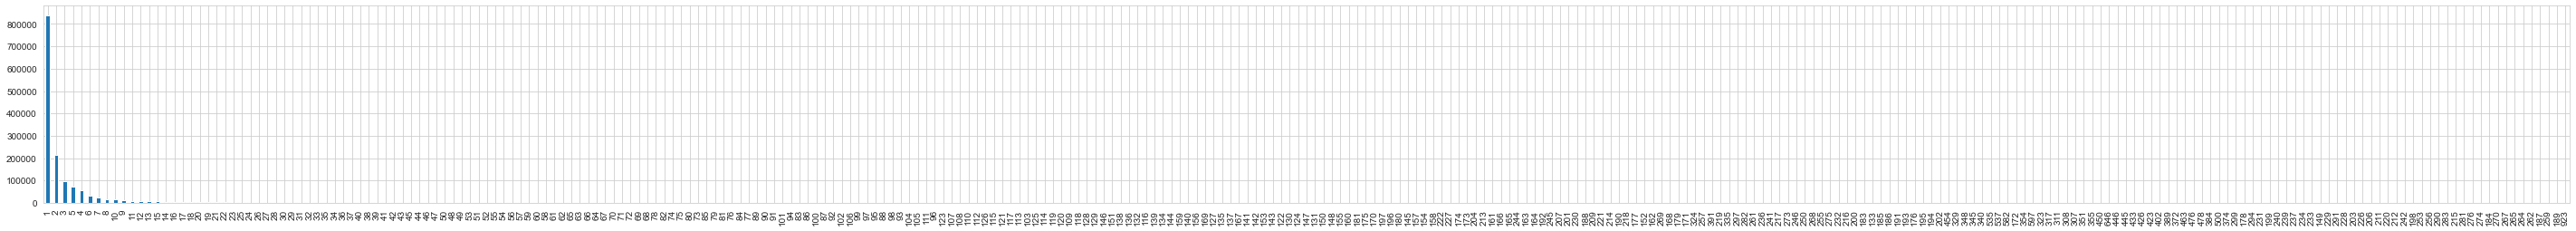

In [40]:
plt.figure(figsize=(50,4))

song_df.freq.value_counts().plot(kind='bar')

<AxesSubplot:>

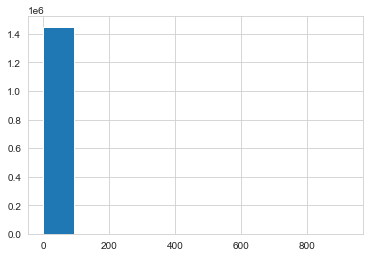

In [41]:
song_df.freq.hist()

- From the two plots we can see that the most of the songs listned in B/W 1-50

**Let's look in to the outliers**

In [42]:
def Upper_lower(col):
    Q1= np.percentile(col,25)
    Q3= np.percentile(col,75)
    IQR = Q3-Q1
    Upper = Q3+1.5*IQR
    Lower = Q1-1.5*IQR
    return(Upper,Lower)
    

In [43]:
Upper,Lower = Upper_lower(song_df.freq)
Upper,Lower

(6.0, -2.0)

In [44]:
song_df[(song_df.freq<Lower)|(song_df.freq>Upper)]

,user_id,song_id,freq,artist_name,title
28,9be82340a8b5ef32357fe5af957ccd54736ece95,SOHGGAH12A58A795BE,15,Slum Village,Climax
55,91b8fac7dc5e03f6cfaf6e2aa7171f14a8354d62,SODBXDO12A6D4FCD4F,14,Dario Marianelli,Love Letters
62,91b8fac7dc5e03f6cfaf6e2aa7171f14a8354d62,SOUDGEV12A8C135FC9,10,Counting Crows / Vanessa Carlton,Big Yellow Taxi
86,0f40e074aab2c5f47b7ddc2277fb0295b5b3a058,SORIWEH12A8C13D4A6,54,Was (Not Was),The Sky's Ablaze
119,e9dc6b4c2b22aa6dc8260e1963021567728055b2,SOYOMRA12A6D4F9975,11,Phil Collins,You Can't Hurry Love
...,...,...,...,...,...
1450855,07f2f354a2a4390624e0d04e4a555ef67e98f673,SOECSYA12A8C134C34,41,Catupecu Machu,Origen Extremo
1450856,07f2f354a2a4390624e0d04e4a555ef67e98f673,SODPPBT12A8C141D90,9,Kings Of Leon,Closer
1450859,07f2f354a2a4390624e0d04e4a555ef67e98f673,SOGMNZG12AB0182DAD,24,Veto,You Are A Knife
1450870,07f2f354a2a4390624e0d04e4a555ef67e98f673,SONGIXY12A58A7BB42,10,LCD Soundsystem,Someone Great


In [45]:
(song_df[(song_df.freq<Lower)|(song_df.freq>Upper)].shape[0]/song_df.shape[0])*100

9.770065034060865

<AxesSubplot:xlabel='freq'>

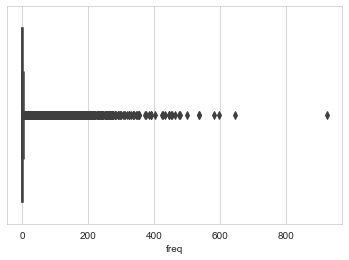

In [46]:
sns.boxplot(song_df.freq)

### Artist_name

In [47]:
artist  = pd.DataFrame(song_df.artist_name.value_counts())
artist

,artist_name
Coldplay,12279
Kings Of Leon,8514
Florence + The Machine,8213
Justin Bieber,7669
Jack Johnson,6784
...,...
Swizz Beatz / Drag On,1
Billy Idol With Generation X,1
Mike Dunn,1
Johnny Lima,1


- **There are  28360 artists in the given data**

In [48]:
# The top 10 populer artists in the given data are 

artist.index[:10]

Index(['Coldplay', 'Kings Of Leon', 'Florence + The Machine', 'Justin Bieber',
       'Jack Johnson', 'Train', 'The Black Keys', 'Eminem', 'OneRepublic',
       'Muse'],
      dtype='object')

<AxesSubplot:>

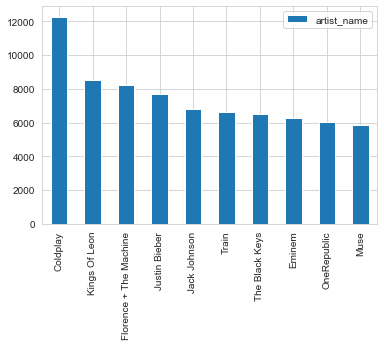

In [49]:
artist[:10].plot(kind='bar')

In [50]:
artist[artist.artist_name ==1]

,artist_name
Fedde Le Grand Feat. Mitch Crown,1
Harold Budd And Eugene Bowen,1
Masters At Work featuring India,1
John Forte,1
le Shuuk,1
...,...
Swizz Beatz / Drag On,1
Billy Idol With Generation X,1
Mike Dunn,1
Johnny Lima,1


In [51]:
artist[artist.artist_name <3].shape[0]/artist.shape[0]

0.29862482369534554

- There are few artists who are just occoured once or twise in the given data (**nearly 30%**)

- As we no the title and song id is representing the same 

In [52]:
artist_more_then_1000 = list(artist[artist.artist_name>999].index)
artist_between_500_to_1000 = list(artist[(artist.artist_name<1000)&(artist.artist_name>500)].index)
artist_between_500_to_100= list(artist[(artist.artist_name<501)&(artist.artist_name>101)].index)
artist_between_100_to_50 = list(artist[(artist.artist_name<101)&(artist.artist_name>50)].index)
artist_between_50_to_10 = list(artist[(artist.artist_name<51)&(song_info.song_id>10)].index)
artist_between_10_to_5 = list(artist[(artist.artist_name<11)&(artist.artist_name>5)].index)
artist_less_then_5 = list(artist[(artist.artist_name<6)].index)

In [53]:
len(artist_between_100_to_50)

1806

In [54]:
artist_data = {'artist_more_then_1000': len(artist_more_then_1000),\
            "artist_between_500_to_1000":len(artist_between_500_to_1000),\
            'artist_between_500_to_100':len(artist_between_500_to_100),\
            'artist_between_100_to_50':len(artist_between_100_to_50),\
            'artist_between_50_to_10':len(artist_between_50_to_10),\
            'artist_between_10_to_5':len(artist_between_10_to_5),\
            'artist_less_then_5':len(artist_less_then_5)}

In [55]:
artist_data

{'artist_more_then_1000': 214,
 'artist_between_500_to_1000': 309,
 'artist_between_500_to_100': 1958,
 'artist_between_100_to_50': 1806,
 'artist_between_50_to_10': 0,
 'artist_between_10_to_5': 3749,
 'artist_less_then_5': 13321}

<Figure size 1440x360 with 0 Axes>

<BarContainer object of 7 artists>

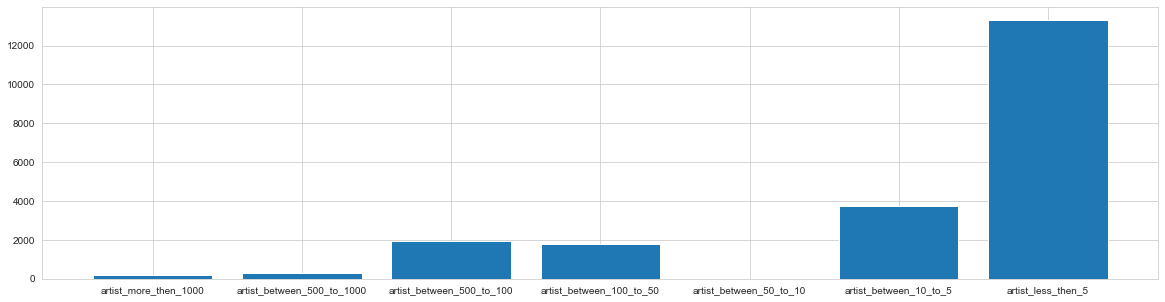

In [56]:
plt.figure(figsize=(20,5))
keys = artist_data. keys()
values = artist_data. values()
plt. bar(keys, values)


In [57]:
title_info = pd.DataFrame(song_df.title.value_counts())

In [58]:
title_info

,title
Sehr kosmisch,5043
Undo,4483
You're The One,4270
Dog Days Are Over (Radio Edit),3780
Revelry,3672
...,...
Idle Hands,1
Born With The Blues,1
Ma FiancÃ©e_ Elle Est Partie,1
Hackett To Pieces,1


In [59]:
title_info[:10].index

Index(['Sehr kosmisch', 'Undo', 'You're The One',
       'Dog Days Are Over (Radio Edit)', 'Revelry', 'Secrets',
       'Horn Concerto No. 4 in E flat K495: II. Romance (Andante cantabile)',
       'Hey_ Soul Sister', 'Fireflies', 'Tive Sim'],
      dtype='object')

<AxesSubplot:>

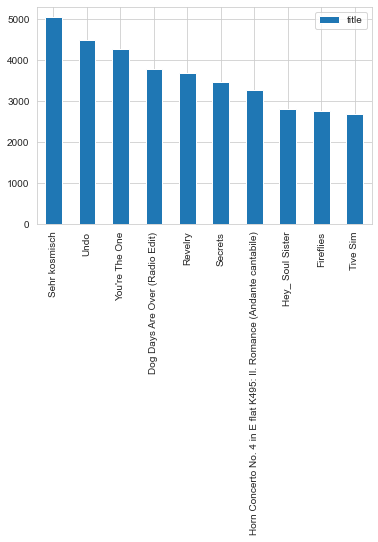

In [60]:
title_info[:10].plot(kind='bar')

- Top 10 populer songs in the data are shown in the above graph

In [61]:
title_info[title_info.title==1]

,title
We Got The Rock'n' Roll,1
Silent Night All Day Long,1
Fool For The Night,1
Spirit Lives On (LP Version),1
Sleep A Million Years&#160;,1
...,...
Idle Hands,1
Born With The Blues,1
Ma FiancÃ©e_ Elle Est Partie,1
Hackett To Pieces,1


In [62]:
(title_info[title_info.title==1].shape[0]/title_info.shape[0])*100

37.21680496417828

- There are 51220  songs which are just listned once by the user in the entire data(**around 37%**)

In [63]:
song_df.head()

,user_id,song_id,freq,artist_name,title
0,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,SOBONKR12A58A7A7E0,1,Dwight Yoakam,You're The One
1,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,SOEGIYH12A6D4FC0E3,1,Barry Tuckwell/Academy of St Martin-in-the-Fie...,Horn Concerto No. 4 in E flat K495: II. Romanc...
2,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,SOFLJQZ12A6D4FADA6,1,Cartola,Tive Sim
3,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,SOHTKMO12AB01843B0,1,Lonnie Gordon,Catch You Baby (Steve Pitron & Max Sanna Radio...
4,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,SODQZCY12A6D4F9D11,1,Miguel Calo,El Cuatrero


In [64]:
song_df['song'] = song_df['artist_name']+'-'+song_df['title']

In [65]:
song_df

,user_id,song_id,freq,artist_name,title,song
0,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,SOBONKR12A58A7A7E0,1,Dwight Yoakam,You're The One,Dwight Yoakam-You're The One
1,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,SOEGIYH12A6D4FC0E3,1,Barry Tuckwell/Academy of St Martin-in-the-Fie...,Horn Concerto No. 4 in E flat K495: II. Romanc...,Barry Tuckwell/Academy of St Martin-in-the-Fie...
2,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,SOFLJQZ12A6D4FADA6,1,Cartola,Tive Sim,Cartola-Tive Sim
3,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,SOHTKMO12AB01843B0,1,Lonnie Gordon,Catch You Baby (Steve Pitron & Max Sanna Radio...,Lonnie Gordon-Catch You Baby (Steve Pitron & M...
4,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,SODQZCY12A6D4F9D11,1,Miguel Calo,El Cuatrero,Miguel Calo-El Cuatrero
...,...,...,...,...,...,...
1450928,5e650759ebf89012044c6d52121eeada8b0ec814,SOVLNXV12A6D4F706E,1,Mos Def,Ms. Fat Booty,Mos Def-Ms. Fat Booty
1450929,5e650759ebf89012044c6d52121eeada8b0ec814,SOVDSJC12A58A7A271,2,Sam Cooke,Ain't Misbehavin,Sam Cooke-Ain't Misbehavin
1450930,5e650759ebf89012044c6d52121eeada8b0ec814,SOBRHVR12A8C133F35,2,Southside Spinners,Luvstruck,Southside Spinners-Luvstruck
1450931,5e650759ebf89012044c6d52121eeada8b0ec814,SOMGVYU12A8C1314FF,2,J. Karjalainen & Mustat Lasit,Sinisten tÃ¤htien alla,J. Karjalainen & Mustat Lasit-Sinisten tÃ¤htie...


### User songs

In [66]:
#Get unique items (songs) corresponding to a given user(user songs)

def get_user_items(data,user,item_id):
        user_data = data[data.user_id == user]
        user_items = list(user_data[item_id].unique())
        
        return user_items

In [67]:
get_user_items(song_df,user_info.index[5],'song')

['Shawn Mullins-All In My Head',
 'Inner City-Good Life',
 'Will Smith Featuring Dru Hill & Kool Mo Dee-Wild Wild West',
 "Yann Tiersen-La Valse D'AmÃ©lie (Version Orchestre)",
 'Lizzy Parks-Prayer',
 "Johnny Rivers-Walkin' The Dog (Live) (1995 Digital Remaster)",
 'Kurt Carr & The Kurt Carr Singers-My Shepherd (Psalms 23) (featuring Kurt Carr & Avalon)',
 'Morcheeba-Blindfold',
 'Ween-Boing',
 'Markus KrunegÃ¥rd-Dystra utsikter',
 "Robin Thicke-Everything I Can't Have",
 'Santogold-Creator [vs. Switch and FreQ Nasty]',
 'M83-Noise',
 'Blonde Redhead-Heroine',
 "Carter Burwell-Bella's Lullaby (Twilight Soundtrack Version)",
 'Kenny Rogers-Christmas Is My Favorite Time Of The Year',
 'Morcheeba-What New York Couples Fight About (Feat: Kurt Wagner)',
 'Cartola-Tive Sim',
 'Ali Farka TourÃ©_ Toumani DiabatÃ©-Sina Mory',
 'Zero 7-In The Waiting Line',
 'Rex Mundi-Kalua Islands',
 'Mau Mau-Conga Milonga (Live)',
 'Zapp & Roger-Dance Floor',
 'Mutya Buena-Real Girl',
 'Feist-Gatekeeper',
 'T

### Song users

In [68]:
#Get unique users for a given item (song)
def get_item_users(data,item_id,item):
    item_data = data[data[item_id] == item]

    item_users = set(item_data.user_id.unique())
    return item_users



In [69]:
get_item_users(song_df,'song',song_df.song[2])

{'91131e6d2289b3c868d27737f524f0e46cd3b676',
 '9b4e44583f352a025f9d8278f35e5f92ca349185',
 '565b7708437824bf4d289b6850b76264e6c74658',
 '05dbab7ca2b0a68f54173c9c3d090a56f9fa4606',
 'fa422b80919fbc9e8e291c369a978a987ee40aef',
 'e12e163d0e9642b42e7d0b96d7848b8c6645aded',
 'ce45a6697ce02f81adc30450662edbd72674287c',
 'd38425250211a2af6188b351151e43fc4f1d5683',
 'ca3d262201003dfff79e816f8aa4c44e77dda803',
 '78c7e57ee3c0e09f3f38b9ed0c7f73e268e7d70d',
 'c1a77bb7e1ac292727ed82f698538dca38aed35f',
 'e4f9a68e8c30ed12d4282f96118d34c54d87e6e8',
 'cd6681425b33af095d8ddba635d15d345facf3d1',
 '2d5c641a828d0b7cb50a82bca2474d21eee9796e',
 '9f7c5b37d1c1f73abfab12d950f39ad84ed19ff8',
 '6b15b13b04301a44e44be1b716f8701fe800e95f',
 '2588f8964593923cfc8772519b64f1220e166efb',
 'f3c11bfe2dd12fdd28b1bec8c9474a2bcfb9f7c3',
 '51635bc92f807c1e1edfe599313fc178ae5c4067',
 '1b57ca9e17457cc93f825806538681303cc79570',
 'd7abc5f5abefb0dff47ec4fcfd4d01923fc57546',
 '607d2e9088a0fead98f68c39b902544a3db71c90',
 '7721ee40

### All Songs

In [70]:
#Get unique items (songs) in the training data
def get_all_items_train_data(data,item_id):
    all_items = list(data[item_id].unique())
    return all_items

### cooccurence_matrix
Given a document with a set of sentences in it, the co-occurrence matrix is a matrix form of representation of this document. ... To core idea of the co-occurrence matrix is to check if a particular word appears in the context of a focus word.

In [71]:
def construct_cooccurence_matrix(data, user_songs, all_songs,item_id,user_id):
            
        #Get users for all songs in user_songs.
        user_songs_users = []        
        for i in range(0, len(user_songs)):
            user_songs_users.append(get_item_users(data,item_id,user_songs[i]))
            
        #Initialize the item cooccurence matrix of size 
        #len(user_songs) X len(songs)
        cooccurence_matrix = np.matrix(np.zeros(shape=(len(user_songs), len(all_songs))), float)
           
        #Calculate similarity between user songs and all unique songs
        #in the training data
        for i in range(0,len(all_songs)):
            #Calculate unique listeners (users) of song (item) i
            songs_i_data = data[data[item_id] == all_songs[i]]
            users_i = set(songs_i_data[user_id].unique())
            
            for j in range(0,len(user_songs)):       
                    
                #Get unique listeners (users) of song (item) j
                users_j = user_songs_users[j]
                    
                #Calculate intersection of listeners of songs i and j
                users_intersection = users_i.intersection(users_j)
                
                #Calculate cooccurence_matrix[i,j] as Jaccard Index
                if len(users_intersection) != 0:
                    #Calculate union of listeners of songs i and j
                    users_union = users_i.union(users_j)
                    
                    cooccurence_matrix[j,i] = float(len(users_intersection))/float(len(users_union))
                else:
                    cooccurence_matrix[j,i] = 0
                    
        
        return cooccurence_matrix

In [72]:
    #Use the cooccurence matrix to make top recommendations
    def generate_top_recommendations(user, cooccurence_matrix, all_songs, user_songs):
        print("Non zero values in cooccurence_matrix :%d" % np.count_nonzero(cooccurence_matrix))
        
        #Calculate a weighted average of the scores in cooccurence matrix for all user songs.
        user_sim_scores = cooccurence_matrix.sum(axis=0)/float(cooccurence_matrix.shape[0])
        user_sim_scores = np.array(user_sim_scores)[0].tolist()
 
        #Sort the indices of user_sim_scores based upon their value
        #Also maintain the corresponding score
        sort_index = sorted(((e,i) for i,e in enumerate(list(user_sim_scores))), reverse=True)
    
        #Create a dataframe from the following
        columns = ['user_id', 'song', 'score', 'rank']
        #index = np.arange(1) # array of numbers for the number of samples
        df = pd.DataFrame(columns=columns)
         
        #Fill the dataframe with top 10 item based recommendations
        rank = 1 
        for i in range(0,len(sort_index)):
            if ~np.isnan(sort_index[i][0]) and all_songs[sort_index[i][1]] not in user_songs and rank <= 10:
                df.loc[len(df)]=[user,all_songs[sort_index[i][1]],sort_index[i][0],rank]
                rank = rank+1
        
        #Handle the case where there are no recommendations
        if df.shape[0] == 0:
            print("The current user has no songs for training the item similarity based recommendation model.")
            return -1
        else:
            return df


In [73]:
    def recommend(data,user,user_id,item_id):
        
        #A. Get all unique songs for this user
        user_songs = get_user_items(data,user,item_id)    
            
        print("No. of unique songs for the user: %d" % len(user_songs))
        
        #B. Get all unique items (songs) in the training data
        all_songs = get_all_items_train_data(data,item_id)
        
        print("no. of unique songs in the training set: %d" % len(all_songs))
         
        #C. Construct item cooccurence matrix of size 
        #len(user_songs) X len(songs)
        cooccurence_matrix = construct_cooccurence_matrix(data, user_songs, all_songs,item_id,user_id)
        
        #D. Use the cooccurence matrix to make recommendations
        
        df_recommendations = generate_top_recommendations(user, cooccurence_matrix, all_songs, user_songs)
                
        return df_recommendations

In [74]:
user = user_info.index[5]

In [75]:
song_df.shape

(1450932, 6)

In [76]:
song_df[:90000]

,user_id,song_id,freq,artist_name,title,song
0,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,SOBONKR12A58A7A7E0,1,Dwight Yoakam,You're The One,Dwight Yoakam-You're The One
1,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,SOEGIYH12A6D4FC0E3,1,Barry Tuckwell/Academy of St Martin-in-the-Fie...,Horn Concerto No. 4 in E flat K495: II. Romanc...,Barry Tuckwell/Academy of St Martin-in-the-Fie...
2,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,SOFLJQZ12A6D4FADA6,1,Cartola,Tive Sim,Cartola-Tive Sim
3,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,SOHTKMO12AB01843B0,1,Lonnie Gordon,Catch You Baby (Steve Pitron & Max Sanna Radio...,Lonnie Gordon-Catch You Baby (Steve Pitron & M...
4,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,SODQZCY12A6D4F9D11,1,Miguel Calo,El Cuatrero,Miguel Calo-El Cuatrero
...,...,...,...,...,...,...
89995,fe99704b38be8b14d7245fdf64321385e26865db,SOUVGJL12AB017FC35,1,Taylor Swift,Our Song,Taylor Swift-Our Song
89996,fe99704b38be8b14d7245fdf64321385e26865db,SOWGCMN12A8C136E44,1,LU,Una Confusion,LU-Una Confusion
89997,fe99704b38be8b14d7245fdf64321385e26865db,SONNKKX12A81C22CAC,2,Theatre Of Tragedy,Crash / Concrete,Theatre Of Tragedy-Crash / Concrete
89998,8c7d3be7fec8a4d4ef534a683c1b700f37316333,SOMHHTD12A67ADE988,1,Arcade Fire,Ocean Of Noise,Arcade Fire-Ocean Of Noise


In [77]:
aa =pd.DataFrame(song_df[:90000].user_id.value_counts())

In [78]:
user  = aa.index[6]

In [79]:
recommend(song_df[:90000],user,'user_id','song')

No. of unique songs for the user: 45
no. of unique songs in the training set: 38314
Non zero values in cooccurence_matrix :19254


,user_id,song,score,rank
0,6f21e1ae94903ca6f82e6789344cb8d7e5fe5743,The Black Keys-Unknown Brother,0.016274,1
1,6f21e1ae94903ca6f82e6789344cb8d7e5fe5743,The Black Keys-Too Afraid To Love,0.014152,2
2,6f21e1ae94903ca6f82e6789344cb8d7e5fe5743,Cut Copy-Out There On The Ice,0.014065,3
3,6f21e1ae94903ca6f82e6789344cb8d7e5fe5743,Grand National-Your Rules Obey,0.012593,4
4,6f21e1ae94903ca6f82e6789344cb8d7e5fe5743,Grand National-Coming Round,0.012593,5
5,6f21e1ae94903ca6f82e6789344cb8d7e5fe5743,Dwight Yoakam-You're The One,0.012505,6
6,6f21e1ae94903ca6f82e6789344cb8d7e5fe5743,Cut Copy-We Fight For Diamonds,0.011728,7
7,6f21e1ae94903ca6f82e6789344cb8d7e5fe5743,The Black Keys-Sinister Kid,0.011526,8
8,6f21e1ae94903ca6f82e6789344cb8d7e5fe5743,Rick Cua-Crossfire,0.011488,9
9,6f21e1ae94903ca6f82e6789344cb8d7e5fe5743,Allen Toussaint-Soul Sister,0.011111,10


In [84]:
user1 = aa.index[30]

In [85]:
recommend(song_df[:90000],user1,'user_id','song')

No. of unique songs for the user: 42
no. of unique songs in the training set: 38314
Non zero values in cooccurence_matrix :9577


,user_id,song,score,rank
0,2f46634ee81fed0870b6698d31216a7a42dc5540,tobyMac-I'm For You,0.017857,1
1,2f46634ee81fed0870b6698d31216a7a42dc5540,Natalie Grant-Shout To The Lord,0.017857,2
2,2f46634ee81fed0870b6698d31216a7a42dc5540,Hans Zimmer-Daniel's 9th Cipher,0.016667,3
3,2f46634ee81fed0870b6698d31216a7a42dc5540,Jan A.P. Kaczmarek / Nick Ingman-Why Does She ...,0.016667,4
4,2f46634ee81fed0870b6698d31216a7a42dc5540,The Gathering-Adrenaline,0.016667,5
5,2f46634ee81fed0870b6698d31216a7a42dc5540,Martin O'Donnell And Michael Salvatori-Truth A...,0.016667,6
6,2f46634ee81fed0870b6698d31216a7a42dc5540,Jean-Yves Thibaudet-Another Dance,0.016667,7
7,2f46634ee81fed0870b6698d31216a7a42dc5540,Jean-Yves Thibaudet-The Secret Life of Daydreams,0.016667,8
8,2f46634ee81fed0870b6698d31216a7a42dc5540,Jean-Yves Thibaudet-A Postcard to Henry Purcell,0.016667,9
9,2f46634ee81fed0870b6698d31216a7a42dc5540,Dario Marianelli-The Half Killed,0.016667,10


The first model is popularity based recommender, meaning it is not personalized toward any user and will output the same list of recommended songs. The second model is personalized recommender leveraging the item similarity based collaborative filtering model (ie the cooccurence matrix) to find a personalized list of song that a user might like based on what other similar user have liked.
